**Задание    
Предположим, что мы построили рекомендательную систему и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Необходимо предложить (с обоснованием) и провести статистический тест, который можно применить к этим данным (разрешено пользоваться следующими библиотеками: scipy, statsmodels), а также сделать выводы по результатам.
Синтетические данные по среднему чеку до и после включения рекомендательной системы необходимо сгенерировать самостоятельно**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Генерация синтетических данных
Предположим, что средний чек до внедрения рекомендательной системы был 0.5 т.р.
А после внедрения стал 0,7 т.р.

In [ ]:
np.random.seed(42) #фиксируем сгенерированные случайные числа
# логнормальное распределение, т.к. большинство фин. операций имеют логнормальное распределение
check_to = np.random.lognormal(0.5, 0.100, 2000) #значения среднего чека (т.р.) до внедрения рек. системы. 2 000 значений, среднее 0,500, отклонение 0,100
check_after = np.random.lognormal(0.7, 0.150, 2000) #значения среднего чека после внедрения рек. системы. 2 000 значений, среднее 0,700, отклонение 0,150

## Предварительный анализ данных
### Построим графики, посмотрим описательную статистику, посмотрим какие распределения (забыли, что мы сами генерировали жанные)


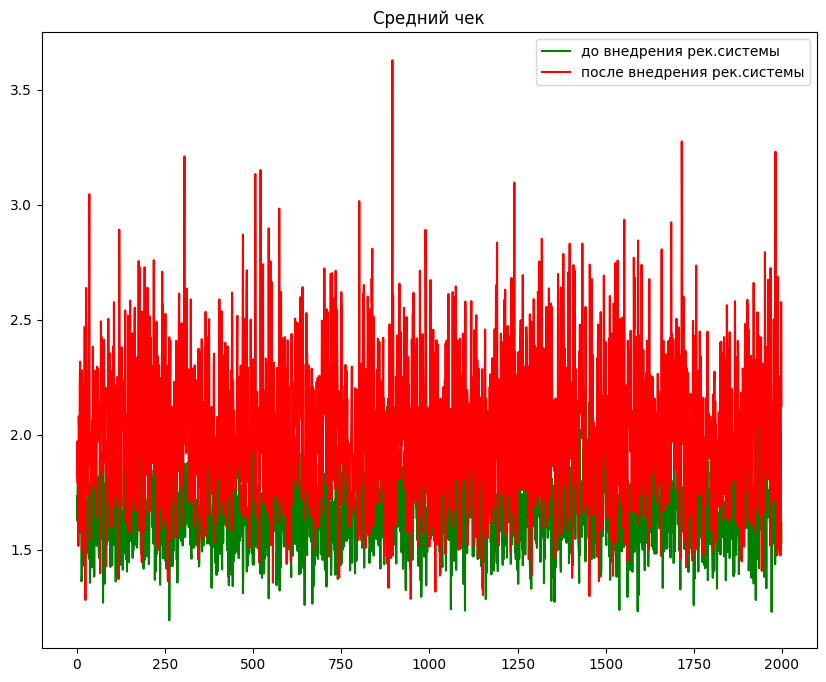

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(check_to, c = 'g', label = 'до внедрения рек.системы')
plt.plot(check_after, c = 'r', label = 'после внедрения рек.системы')
plt.title('Средний чек')
plt.legend()
plt.show()

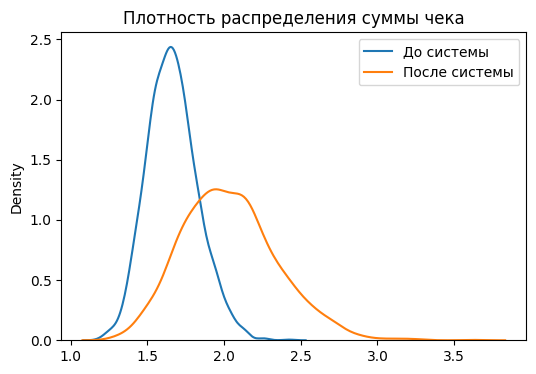

In [ ]:
plt.figure(figsize = (6,4))
sns.kdeplot(check_to, label = 'До системы')
sns.kdeplot(check_after, label = 'После системы')
plt.title('Плотность распределения суммы чека')
plt.legend()
plt.show()

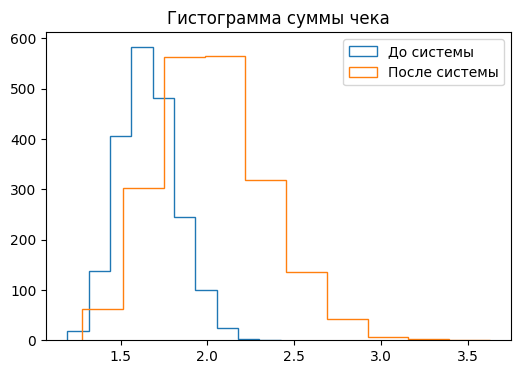

In [ ]:
plt.figure(figsize = (6,4))
plt.hist(check_to, histtype = 'step', label = 'До системы')
plt.hist(check_after, histtype = 'step', label = 'После системы')
plt.title('Гистограмма суммы чека')
plt.legend()
plt.show()

In [ ]:
#Описательная статистика по наборам данных
print(f'среднее значение до запуска системы - {round(check_to.mean(), 2)}')
print(f'среднее значение после запуска системы - {round(check_after.mean(), 2)}')

print(f'стандартное отклонение до запуска системы - {round(check_to.std(), 2)}')
print(f'стандартное отклонение после запуска системы - {round(check_after.std(), 2)}')

среднее значение до запуска системы - 1.66
среднее значение после запуска системы - 2.03
стандартное отклонение до запуска системы - 0.17
стандартное отклонение после запуска системы - 0.31


Судя по графикам, выборки отличаются. Проверим с помощью АВ тестирования действительно ли это так.

In [ ]:
#проверим нормальное распределение или нет
def check_normality(data):
  """Функция проверки нормальности распределения с помощью теста Шапиро-Уилка.
  На вход набор данных.
  На выход распечатка результата проверки теста.
  """
  stat, p = st.shapiro(data) # тест Шапиро-Уилка на проверку нормальности данных
  if p < 0.05: #условие статистической значимости
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
check_normality(check_to)
check_normality(check_after)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


## Построение гипотез
Поскольку оба набора имеют отличное от нормального распределение, то используем критерий Манна-Уитни.

In [ ]:
stat, p = st.mannwhitneyu(check_to, check_after)
print(f'Статистика - {stat}, p - {p}')
if p < 0.05:
  print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')
else:
  print('Не отклоняем нулевую гипотезу, выборки, вероятно, одинаковые')

Статистика - 564534.0, p - 0.0
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


## Вывод
Данные, полученные после внедрения рекомендательной системы, статистически отличаются. Т.е. можно сделать вывод, что внедрение рекомендательной системы возымело результат и привело к повыению среднего чека (т.к. среднее после внедрения системы больше чем до).